In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import json
import re
import csv
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
pip install plotly

In [ ]:
# Lendo um arquivo CSV chamado 'netflix_titles.csv' e armazenando os dados em um DataFrame chamado 'df'
df = pd.read_csv('netflix_titles.csv')

# Exibindo as primeiras linhas do DataFrame 'df' para visualizar os dados
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Fazendo uma breve análise exploratória dos dados

In [ ]:
# O código abaixo é usado para exibir informações resumidas sobre um DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# O código abaixo é usado para gerar estatísticas descritivas para colunas com tipos de dados 'object' (ou seja, colunas de texto) em um DataFrame.
df.describe(include = 'O')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [ ]:
# O código abaixo calcula a porcentagem de valores ausentes (NaN) em cada coluna do DataFrame.
df.isna().sum() * 100 / len(df)

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [ ]:
# Substituição de Valores Ausentes

# Substitui valores ausentes na coluna 'country' pelo valor mais frequente (moda) da mesma coluna.
df['country'] = df['country'].fillna(df['country'].mode()[0])

# Substitui valores NaN (valores ausentes) nas colunas 'cast' e 'director' pelo texto 'No Data'.
df['cast'].replace(np.nan, 'No Data', inplace=True)
df['director'].replace(np.nan, 'No Data', inplace=True)

# Remoção de Linhas com Valores Ausentes

# Remove todas as linhas que contenham pelo menos um valor ausente.
df.dropna(inplace=True)

# Remoção de Linhas Duplicadas

# Remove linhas duplicadas com base em todas as colunas do DataFrame.
df.drop_duplicates(inplace=True)

In [ ]:
# Conversão de Coluna para Formato de Data

# Converte a coluna 'date_added' para o formato de data e hora usando o método to_datetime do Pandas.
df["date_added"] = pd.to_datetime(df['date_added'])

# Extração de Componentes de Data

# Cria uma nova coluna 'month_added' que contém o mês da data de adição extraído da coluna 'date_added'.
df['month_added'] = df['date_added'].dt.month

# Cria uma nova coluna 'month_name_added' que contém o nome do mês da data de adição extraído da coluna 'date_added'.
df['month_name_added'] = df['date_added'].dt.month_name()

# Cria uma nova coluna 'year_added' que contém o ano da data de adição extraído da coluna 'date_added'.
df['year_added'] = df['date_added'].dt.year

# Exibição das Primeiras 3 Linhas do DataFrame

# Exibe as primeiras 3 linhas do DataFrame para visualização.
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021


In [ ]:
# Filtragem de Filmes e Séries da Netflix

# Cria um novo DataFrame 'netflix_shows' que contém apenas as linhas onde a coluna 'type' é igual a 'Movie' (ou seja, filmes).
netflix_shows = df[df['type'] == 'Movie']

# Cria um novo DataFrame 'netflix_movies' que contém apenas as linhas onde a coluna 'type' é igual a 'TV Show' (ou seja, séries de TV).
netflix_movies = df[df['type'] == 'TV Show']

#Plotando gráficos com diversas informações sobre os dados da netflix

In [ ]:
import pandas as pd
import plotly.express as px

# Suponhamos que você tenha um DataFrame chamado 'df' com todas as colunas relevantes

# Converte a coluna 'duration' para um formato numérico (por exemplo, minutos)
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)

# Plota o gráfico 3D interativo
fig = px.scatter_3d(
    df,
    x='release_year',
    y='duration',
    z='rating',
    color='year_added',  # Codificando o ano de adição com cores
    labels={'release_year': 'Ano de Lançamento', 'duration': 'Duração (minutos)', 'rating': 'Classificação', 'year_added': 'Ano de Adição'},
    title='Gráfico 3D Interativo com Todas as Colunas'
)

# Mostra o gráfico
fig.show()


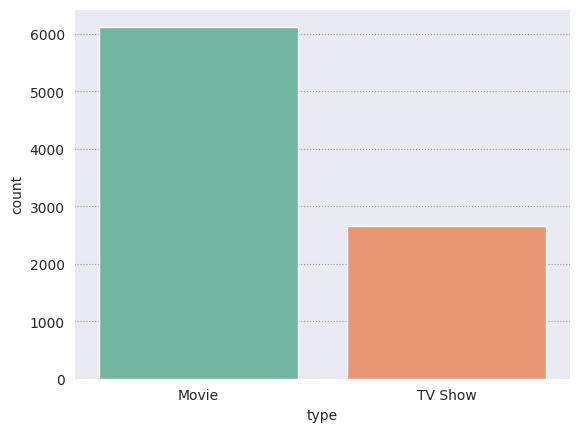

In [ ]:
# Gráfico de Contagem de Filmes e Séries de TV

# Define o estilo do gráfico com fundo de grade escura e estilo de grade pontilhada.
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

# Cria um gráfico de contagem (countplot) que conta e exibe a distribuição de filmes e séries de TV no DataFrame 'df'.
# A coluna 'type' do DataFrame é usada como o eixo x do gráfico.
# A paleta de cores 'Set2' é usada para a plotagem.
ax = sns.countplot(x="type", data=df, palette="Set2")

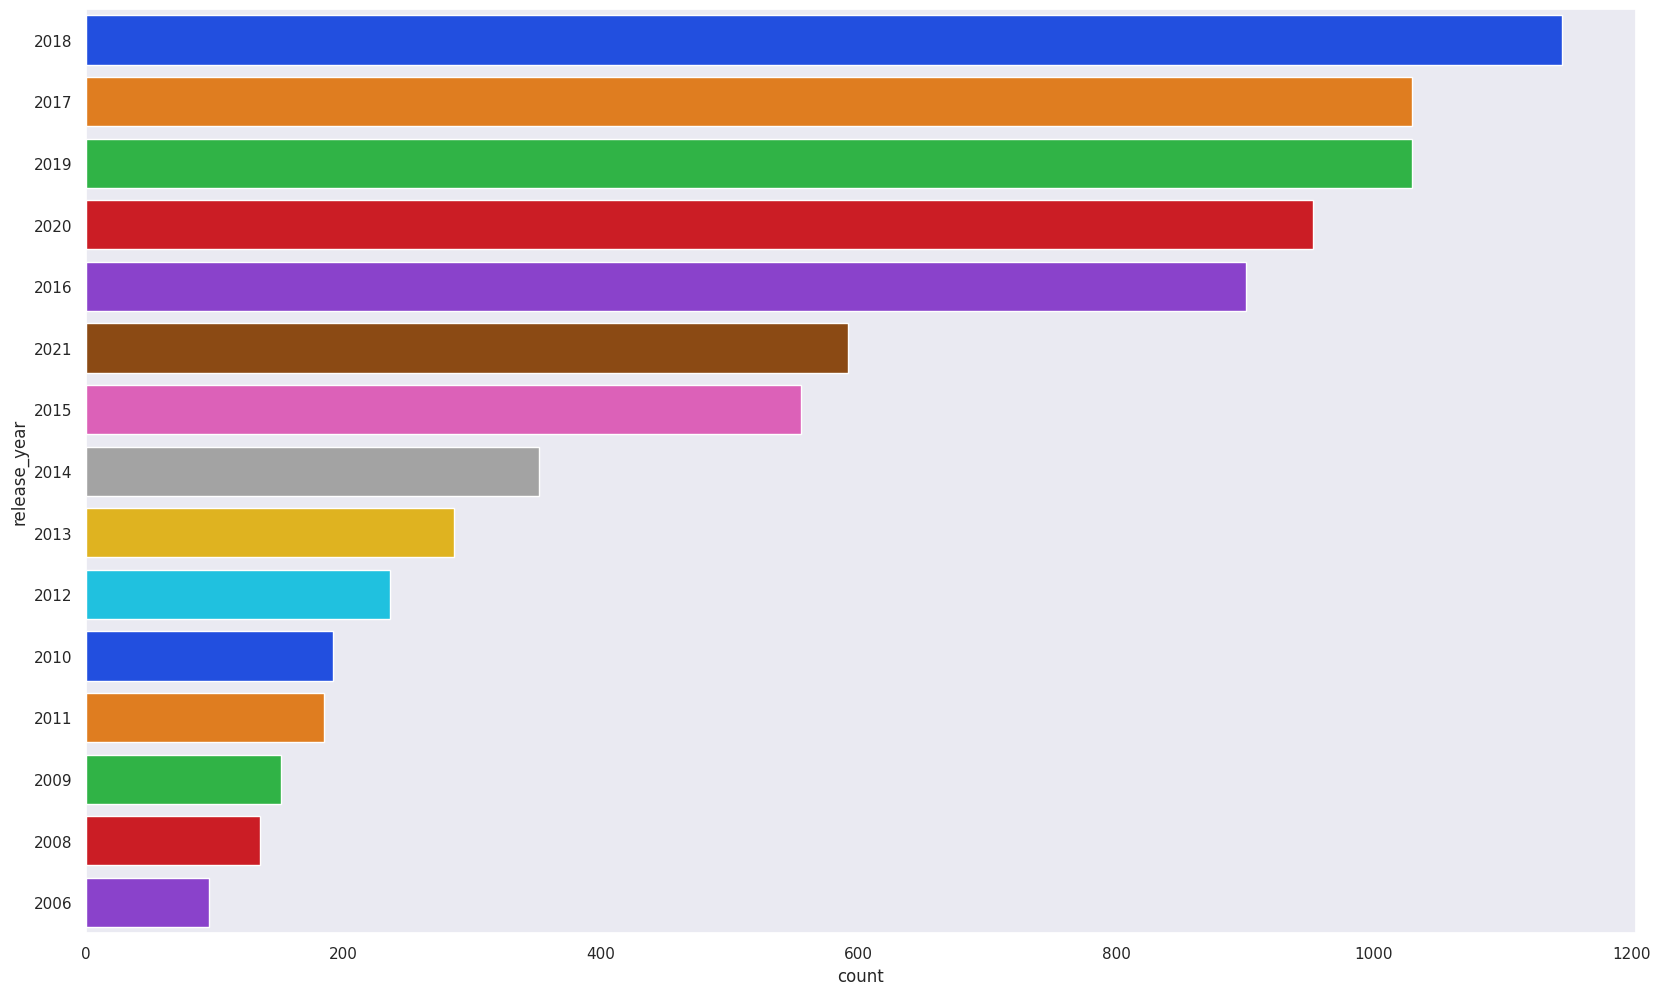

In [ ]:
# Gráfico de Contagem de Anos de Lançamento

# Define o tamanho da figura do gráfico para 20 unidades de largura por 12 unidades de altura.
plt.figure(figsize=(20, 12))

# Define o estilo do gráfico com fundo escuro.
sns.set(style="dark")

# Cria um gráfico de contagem (countplot) que conta e exibe a distribuição dos anos de lançamento de conteúdo no DataFrame 'df'.
# A coluna 'release_year' do DataFrame é usada como o eixo y do gráfico.
# A paleta de cores 'bright' é usada para a plotagem.
# A ordem dos anos no gráfico é determinada pelas contagens de cada ano nas 15 principais posições.
ax = sns.countplot(y="release_year", data=df, palette="bright", order=df['release_year'].value_counts().index[0:15])

<ipython-input-39-24454ebb43db>:59: MatplotlibDeprecationWarning:

The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.



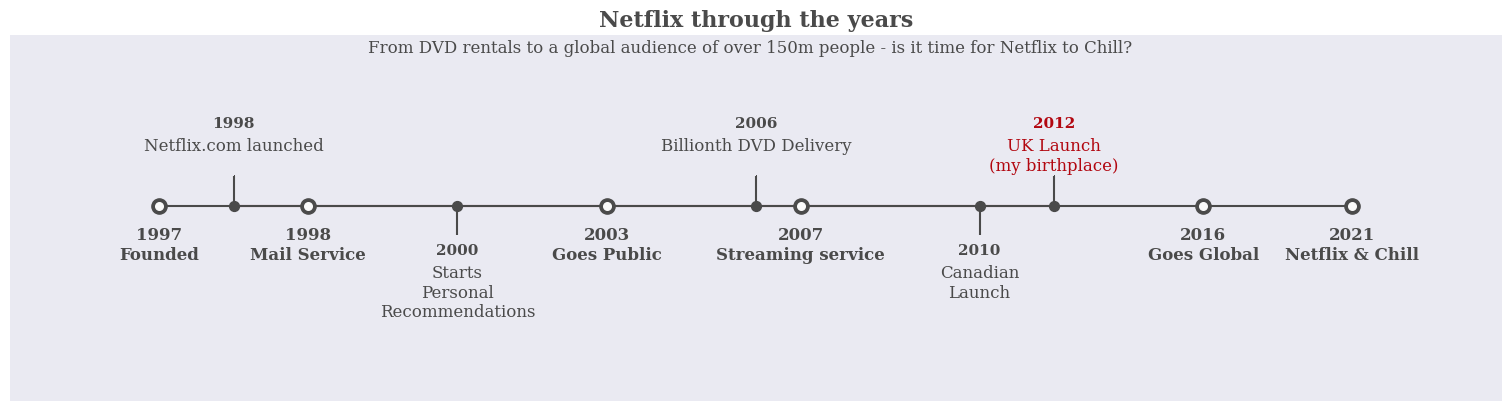

In [ ]:
# Importações necessárias
from datetime import datetime

# Datas e valores para marcar na linha do tempo
tl_dates = [
    "1997\nFounded",
    "1998\nMail Service",
    "2003\nGoes Public",
    "2007\nStreaming service",
    "2016\nGoes Global",
    "2021\nNetflix & Chill"
]

# Posições para marcar as datas na linha do tempo
tl_x = [1, 2, 4, 5.3, 8, 9]

# Posições adicionais para marcar pontos na linha do tempo
tl_sub_x = [1.5, 3, 5, 6.5, 7]

# Anos correspondentes aos pontos adicionais na linha do tempo
tl_sub_times = [
    "1998","2000","2006","2010","2012"
]

# Texto explicativo para os pontos adicionais na linha do tempo
tl_text = [
    "Netflix.com launched",
    "Starts\nPersonal\nRecommendations",
    "Billionth DVD Delivery",
    "Canadian\nLaunch",
    "UK Launch\n(my birthplace)"
]

# Configuração da figura e dos eixos
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)

# Linha do tempo: linha principal
ax.axhline(0, xmin=0.1, xmax=0.9, c='#4a4a4a', zorder=1)

# Linha do tempo: Pontos de Data
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)

# Linha do tempo: Pontos de Tempo (adicionais)
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a', zorder=4)

# Texto das Datas
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center',
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a', fontsize=12)

# Linhas verticais (stemplot) para os pontos de Tempo (adicionais)
levels = np.zeros(len(tl_sub_x))
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Texto explicativo para os pontos de Tempo (adicionais)
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center',
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710', fontsize=11)

    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center',
        fontfamily='serif',color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710')

# Remoção das bordas dos eixos
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Remoção das marcações nos eixos
ax.set_xticks([])
ax.set_yticks([])

# Título do gráfico
ax.set_title("Netflix through the years", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')
ax.text(2.4,1.57,"From DVD rentals to a global audience of over 150m people - is it time for Netflix to Chill?", fontfamily='serif', fontsize=12, color='#4a4a4a')

# Exibição do gráfico
plt.show()


In [ ]:
# Engenharia de recursos rápida

# Coluna auxiliar para várias visualizações
df['count'] = 1

# Muitas produções têm vários países listados - isso pode distorcer nossos resultados, vamos pegar apenas o primeiro mencionado

# Vamos recuperar apenas o primeiro país
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country'].head()

# Idades de classificação deste notebook: https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly

idades_classificacao = {
    'TV-PG': 'Crianças mais velhas',
    'TV-MA': 'Adultos',
    'TV-Y7-FV': 'Crianças mais velhas',
    'TV-Y7': 'Crianças mais velhas',
    'TV-14': 'Adolescentes',
    'R': 'Adultos',
    'TV-Y': 'Crianças',
    'NR': 'Adultos',
    'PG-13': 'Adolescentes',
    'TV-G': 'Crianças',
    'PG': 'Crianças mais velhas',
    'G': 'Crianças',
    'UR': 'Adultos',
    'NC-17': 'Adultos'
}

df['idades_alvo'] = df['rating'].replace(idades_classificacao)
df['idades_alvo'].unique()

# Gênero

df['gênero'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))

# Reduzindo o comprimento dos nomes

df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

<ipython-input-41-de58292b0a67>:25: UserWarning:

FixedFormatter should only be used together with FixedLocator



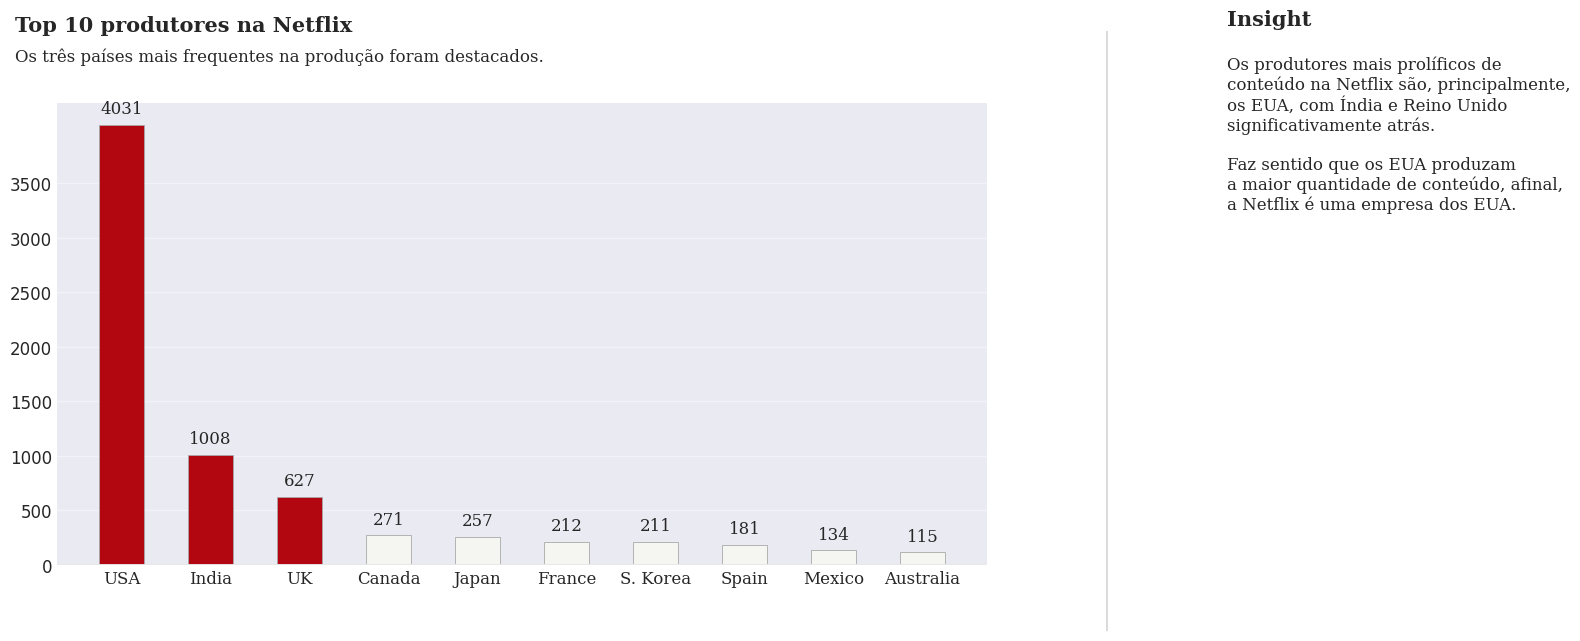

In [ ]:
# Calcula a soma das contagens de produções agrupadas por país e pega os 10 principais países.
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

# Define um esquema de cores, destacando as três primeiras barras.
color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710'

# Cria uma figura e um eixo para o gráfico.
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Cria um gráfico de barras com os dados, especificando cores e estilos.
ax.bar(data.index, data, width=0.5, edgecolor='darkgray', linewidth=0.6, color=color_map)

# Adiciona anotações acima das barras.
for i in data.index:
    ax.annotate(f"{data[i]}",
                   xy=(i, data[i] + 150), # Ajusta a posição das anotações.
                   va='center', ha='center', fontweight='light', fontfamily='serif')

# Remove as bordas do gráfico nas partes superior, esquerda e direita.
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Define os rótulos no eixo x com base nos países, usando fonte serif e rotação de 0 graus.
ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Adiciona título e sub-título à figura.
fig.text(0.09, 1, 'Top 10 produtores na Netflix', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Os três países mais frequentes na produção foram destacados.', fontsize=12, fontweight='light', fontfamily='serif')

# Adiciona uma seção de insights à figura.
fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.67, '''
Os produtores mais prolíficos de
conteúdo na Netflix são, principalmente,
os EUA, com Índia e Reino Unido
significativamente atrás.

Faz sentido que os EUA produzam
a maior quantidade de conteúdo, afinal,
a Netflix é uma empresa dos EUA.
''', fontsize=12, fontweight='light', fontfamily='serif')

# Adiciona uma grade horizontal no eixo y com estilo de linha sólida e transparência de 0.4.
ax.grid(axis='y', linestyle='-', alpha=0.4)

# Define os ticks no eixo y para facilitar a leitura das contagens.
grid_y_ticks = np.arange(0, 4000, 500)
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

# Adiciona uma linha horizontal mais espessa na parte inferior do gráfico.
plt.axhline(y=0, color='black', linewidth=1.3, alpha=0.7)

# Ajusta os parâmetros dos ticks nos eixos.
ax.tick_params(axis='both', which='major', labelsize=12)

# Adiciona uma linha vertical à direita da figura.
import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])

# Remove os ticks dos eixos.
ax.tick_params(axis=u'both', which=u'both', length=0)

# Exibe o gráfico.
plt.show()

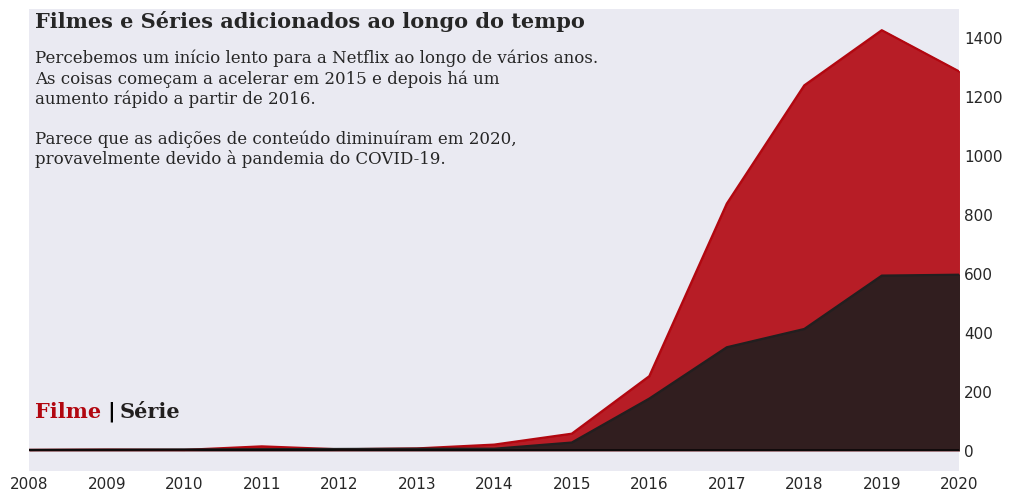

In [ ]:
# Cria uma figura e um único eixo com tamanho de 12x6 polegadas.
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Define uma lista de cores para diferentes tipos de conteúdo (Filmes e Séries).
color = ["#b20710", "#221f1f"]

# Itera pelos tipos de conteúdo (Filmes e Séries).
for i, mtv in enumerate(df['type'].value_counts().index):
    # Filtra os dados para o tipo de conteúdo atual (Filmes ou Séries) e conta por ano de adição.
    mtv_rel = df[df['type'] == mtv]['year_added'].value_counts().sort_index()

    # Plota a linha do gráfico com os anos no eixo x e a contagem no eixo y, usando a cor específica.
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)

    # Preenche a área sob a curva da linha com a mesma cor e uma transparência de 0.9.
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)

# Move os ticks do eixo y para a direita.
ax.yaxis.tick_right()

# Adiciona uma linha horizontal na posição y = 0, com cor preta, largura de linha 1.3 e transparência 0.7.
ax.axhline(y=0, color='black', linewidth=1.3, alpha=0.7)

# Define o limite do eixo y de 0 a 50 (comentado).
# Adiciona uma legenda no canto superior esquerdo (comentado).
# Remove as bordas do gráfico nas partes superior, direita, inferior e esquerda.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove as linhas de grade do gráfico.
ax.grid(False)

# Define o limite do eixo x entre 2008 e 2020.
# Define os ticks do eixo x para os anos de 2008 a 2020.
ax.set_xlim(2008, 2020)
plt.xticks(np.arange(2008, 2021, 1))

# Adiciona um título e um sub-título à figura.
fig.text(0.13, 0.85, 'Filmes e Séries adicionados ao longo do tempo', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.59, '''
Percebemos um início lento para a Netflix ao longo de vários anos.
As coisas começam a acelerar em 2015 e depois há um
aumento rápido a partir de 2016.

Parece que as adições de conteúdo diminuíram em 2020,
provavelmente devido à pandemia do COVID-19.
''', fontsize=12, fontweight='light', fontfamily='serif')

# Adiciona rótulos "Filme" e "Série" na parte inferior.
fig.text(0.13, 0.2, "Filme", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19, 0.2, "|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2, 0.2, "Série", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

# Remove os ticks dos eixos.
ax.tick_params(axis=u'both', which=u'both', length=0)

# Exibe o gráfico.
plt.show()


# Sistema de recomendação

In [ ]:
# Importa o TfidfVectorizer para realizar a extração de características de texto.
tfidf = TfidfVectorizer(stop_words='english')

# Preenche valores nulos na coluna 'description' com uma string vazia.
df['description'] = df['description'].fillna('')

# Aplica o TfidfVectorizer à coluna 'description' para criar uma matriz TF-IDF.
tfidf_matrix = tfidf.fit_transform(df['description'])

# Obtém a forma (shape) da matriz TF-IDF, que mostra o número de documentos (linhas) e recursos (colunas).
tfidf_matrix.shape


(8790, 18878)

In [ ]:
# Importa a função linear_kernel da biblioteca sklearn.metrics.pairwise para calcular a similaridade de cosseno.
from sklearn.metrics.pairwise import linear_kernel

# Calcula a similaridade de cosseno entre a matriz TF-IDF das descrições usando linear_kernel.
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
# Cria uma série chamada "indices" que mapeia os títulos para os índices correspondentes no DataFrame.
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [ ]:
# Define a função de sistema de recomendação que utiliza a similaridade de cosseno precalculada.
def get_recommendations_with_similarity(title, cosine_sim=cosine_sim):
    # Obtém o índice do item com base no título fornecido.
    idx = indices[title]

    # Calcula as similaridades de cosseno entre o item de referência e todos os outros itens.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Ordena os itens com base nas pontuações de similaridade, do maior para o menor.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obtém os índices dos 5 itens mais similares (excluindo o próprio item).
    sim_scores = sim_scores[1:6]  # Obtém os 5 itens mais similares

    # Obtém os índices dos filmes/séries mais similares.
    movie_indices = [i[0] for i in sim_scores]

    # Extrai as pontuações de similaridade para cada recomendação.
    similarity_scores = [i[1] for i in sim_scores]

    # Obtém os detalhes dos filmes/séries recomendados (título, descrição e tipo).
    recommendations = df[['title', 'description', 'type']].iloc[movie_indices]

    # Cria um DataFrame com as recomendações e suas respectivas pontuações de similaridade.
    recommendations_with_similarity = recommendations.copy()
    recommendations_with_similarity['similarity_score'] = similarity_scores

    return recommendations_with_similarity

In [ ]:
get_recommendations_with_similarity('Big Mouth')

,title,description,type,similarity_score
8507,The Signal,"During their drive across the country, college...",Movie,0.187833
3095,The Bonfire of Destiny,"After a devastating fire in 1897 Paris, three ...",TV Show,0.149545
5358,Opening Night,"Once a rising star on Broadway, Nick is now th...",Movie,0.148665
6688,Emma' (Mother),"In 1950s Makassar, the life of a devoted mothe...",Movie,0.140033
3921,Who Would You Take to a Deserted Island?,"On their last night together, four longtime fl...",Movie,0.120129


In [ ]:
get_recommendations_with_similarity('Peaky Blinders')

,title,description,type,similarity_score
7683,Our Godfather,"In 1986, Tommaso Buscetta became the first top...",Movie,0.134317
2646,My Stupid Boss,"After moving to Kuala Lumpur, Diana lands a se...",Movie,0.118512
3133,Don,A ruthless crime boss and drug lord is nabbed ...,Movie,0.118478
8293,The Fear,Richie Beckett is an aging Brighton crime boss...,TV Show,0.118185
7140,Jonathan Strange & Mr Norrell,"In 1806, ambitious magician Norrell leads a re...",TV Show,0.114019


In [ ]:
get_recommendations_with_similarity('Stranger Things')

,title,description,type,similarity_score
4733,Rowdy Rathore,A con man uncovers a deadly secret and must sa...,Movie,0.317660
1240,Safe Haven,When a mysterious woman arrives in a small Nor...,Movie,0.231539
1487,Sakho & Mangane,A by-the-book police captain and a brash young...,TV Show,0.202855
8198,The Autopsy of Jane Doe,A father-son team of small-town coroners perfo...,Movie,0.202440
2419,Big Stone Gap,A single middle-aged woman who has lived her w...,Movie,0.196889


# Uso básico do colab

In [ ]:
# Importa a biblioteca 'statistics' para cálculos estatísticos.
import statistics as st

# Lista de dados numéricos.
data = [105, 129, 87, 86, 111, 111, 89, 81, 108, 92, 110,
        100, 75, 105, 103, 109, 76, 119, 99, 91, 103, 129,
        106, 101, 84, 111, 74, 87, 86, 103, 103, 106, 86,
        111, 75, 87, 102, 121, 111, 88, 89, 101, 106, 95,
        103, 107, 101, 81, 109, 104]

# Calcula a média dos valores na lista 'data' utilizando a função 'mean' da biblioteca 'statistics'.
media = st.mean(data)

# Imprime a média calculada.
print("Média dos valores na lista:", media)

Média dos valores na lista: 99.12


# Tipagem dinâmica de dados em Python

In [ ]:
# Define a variável 'país' como a string "Brasil"
país = "Brasil"

# Usa a função 'type' para verificar o tipo de dado da variável 'país' e imprime o resultado
tipo_de_país = type(país)
print(tipo_de_país)

<class 'str'>


In [ ]:
país = 65

In [ ]:
type(país)

int

In [ ]:
país = True
type(país)

bool

# Exemplo com input e print

In [ ]:
nome = input("Informe o seu nome: ")
print(nome)

Informe o seu nome: 



In [ ]:
a = 40
b = 5

print(a*b)

200


# Estruturas de repetição

# while
### Com o loop while , podemos executar um conjunto de instruções, desde que uma condição seja verdadeira.

In [ ]:
i = 1
while i < 6:
  print(i)
  i += 1

1
2
3
4
5


# for
Um loop for é usado para iterar sobre uma sequência (que pode ser uma lista, uma tupla, um dicionário, um conjunto ou uma string).

Isso é menos parecido com a palavra-chave for em outras linguagens de programação e funciona mais como um método iterador encontrado em outras linguagens de programação orientadas a objetos.

Com o loop for podemos executar um conjunto de instruções, uma vez para cada item em uma lista, tupla, conjunto etc.

In [ ]:
fruits = ["apple", "banana", "cherry"]
for x in fruits:
  print(x)

apple
banana
cherry


In [ ]:
#exemplo de como mostrar as letras de uma string
for x in "banana":
  print(x)

b
a
n
a
n
a


In [ ]:
#exemplo com o break
fruits = ["apple", "banana", "cherry"]
for x in fruits:
  print(x)
  if x == "banana":
    break

apple
banana


# Calculadora de IMC

In [70]:
def calcular_imc(peso, altura):
    # Fórmula do IMC: IMC = peso (kg) / (altura (m) ^ 2)
    imc = peso / (altura ** 2)
    return imc

def classificar_imc(imc):
    if imc < 18.5:
        return "Abaixo do peso"
    elif 18.5 <= imc < 24.9:
        return "Peso normal"
    elif 25 <= imc < 29.9:
        return "Sobrepeso"
    elif 30 <= imc < 34.9:
        return "Obesidade Grau I"
    elif 35 <= imc < 39.9:
        return "Obesidade Grau II"
    else:
        return "Obesidade Grau III"

def main():
    print("Calculadora de IMC")
    peso = float(input("Digite seu peso em kg: "))
    altura = float(input("Digite sua altura em metros: "))

    imc = calcular_imc(peso, altura)
    classificacao = classificar_imc(imc)

    print(f"Seu IMC é: {imc:.2f}")
    print(f"Classificação: {classificacao}")

if __name__ == "__main__":
    main()

Calculadora de IMC
Digite seu peso em kg: 63
Digite sua altura em metros: 1.70
Seu IMC é: 21.80
Classificação: Peso normal


# Gerador de poemas

In [73]:
import random

# Listas de palavras para preencher os espaços em branco
substantivos_m = ["rio", "mar", "vento", "bosque", "vale", "oceano"]
substantivos_f = ["lua", "floresta", "manhã", "noite", "tarde", "brisa"]
verbos = ["brilha", "dança", "flui", "encanta", "suspira", "canta"]
adjetivos_m = ["belo", "sereno", "radiante", "suave", "mágico", "etéreo"]
adjetivos_f = ["bela", "serena", "radiante", "suave", "mágica", "etérea"]
lugares = ["céu", "jardim", "deserto"]

# Função para gerar um verso
def gerar_verso():
    genero_substantivo = random.choice(["m", "f"])
    substantivo = random.choice(substantivos_m if genero_substantivo == "m" else substantivos_f)

    if genero_substantivo == "m":
        adjetivo = random.choice(adjetivos_m)
    else:
        adjetivo = random.choice(adjetivos_f)

    verso = f"{adjetivo.capitalize()} {substantivo} {random.choice(verbos)} no {random.choice(lugares)},"
    return verso

# Função para gerar uma estrofe com 4 versos
def gerar_estrofe():
    estrofe = []
    for _ in range(4):
        verso = gerar_verso()
        estrofe.append(verso)
    return "\n".join(estrofe)

# Função para gerar um poema com 3 estrofes
def gerar_poema():
    poema = []
    for _ in range(3):
        estrofe = gerar_estrofe()
        poema.append(estrofe)
    return "\n\n".join(poema)

# Gere e imprima o poema
poema = gerar_poema()
print(poema)

Radiante vale suspira no céu,
Belo oceano brilha no jardim,
Etérea noite suspira no jardim,
Suave mar encanta no jardim,

Sereno oceano canta no deserto,
Suave lua brilha no jardim,
Belo rio encanta no jardim,
Radiante noite flui no jardim,

Mágico mar encanta no deserto,
Suave lua flui no jardim,
Suave manhã canta no deserto,
Radiante vento suspira no deserto,


# Calculadora

In [66]:
import math

# Função para realizar a operação de adição
def adicao(a, b):
    return a + b

# Função para realizar a operação de subtração
def subtracao(a, b):
    return a - b

# Função para realizar a operação de multiplicação
def multiplicacao(a, b):
    return a * b

# Função para realizar a operação de divisão
def divisao(a, b):
    if b == 0:
        return "Erro: divisão por zero"
    return a / b

# Função para elevar um número ao quadrado
def quadrado(a):
    return a ** 2

# Função para elevar um número ao cubo
def cubo(a):
    return a ** 3

# Função para calcular a raiz quadrada de um número
def raiz_quadrada(a):
    return math.sqrt(a)

# Função principal da calculadora
def calculadora():
    print("Calculadora com Operações Adicionais")
    print("Operações disponíveis:")
    print("1. Adição")
    print("2. Subtração")
    print("3. Multiplicação")
    print("4. Divisão")
    print("5. Elevar ao Quadrado")
    print("6. Elevar ao Cubo")
    print("7. Calcular Raiz Quadrada")

    escolha = input("Escolha a operação (1/2/3/4/5/6/7): ")

    if escolha in ['1', '2', '3', '4']:
        num1 = float(input("Digite o primeiro número: "))
        num2 = float(input("Digite o segundo número: "))

        if escolha == '1':
            print("Resultado: ", adicao(num1, num2))
        elif escolha == '2':
            print("Resultado: ", subtracao(num1, num2))
        elif escolha == '3':
            print("Resultado: ", multiplicacao(num1, num2))
        elif escolha == '4':
            print("Resultado: ", divisao(num1, num2))
    elif escolha in ['5', '6', '7']:
        num = float(input("Digite um número: "))

        if escolha == '5':
            print("Resultado: ", quadrado(num))
        elif escolha == '6':
            print("Resultado: ", cubo(num))
        elif escolha == '7':
            if num < 0:
                print("Erro: não é possível calcular a raiz quadrada de um número negativo")
            else:
                print("Resultado: ", raiz_quadrada(num))
    else:
        print("Opção inválida")

# Executar a calculadora
calculadora()


Calculadora com Operações Adicionais
Operações disponíveis:
1. Adição
2. Subtração
3. Multiplicação
4. Divisão
5. Elevar ao Quadrado
6. Elevar ao Cubo
7. Calcular Raiz Quadrada
Escolha a operação (1/2/3/4/5/6/7): 1
Digite o primeiro número: 4
Digite o segundo número: 8
Resultado:  12.0


# Conversor de moedas

In [ ]:
pip install forex-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 4.7 MB/s eta 0:00:00


In [68]:
from forex_python.converter import CurrencyRates

def converter_moeda():
    c = CurrencyRates()

    print("Bem-vindo ao Conversor de Moedas!")

    while True:
        origem = input("Digite a moeda de origem (código, por exemplo, USD): ")
        destino = input("Digite a moeda de destino (código, por exemplo, EUR): ")

        if not c.get_rate(origem, destino):
            print("Moeda de origem ou destino inválida. Tente novamente.")
            continue

        quantidade = float(input("Digite a quantidade a ser convertida: "))

        resultado = c.convert(origem, destino, quantidade)

        print(f"{quantidade} {origem} equivale a {resultado:.2f} {destino}")

        continuar = input("Deseja fazer outra conversão? (s/n): ")
        if continuar.lower() != 's':
            break

if __name__ == "__main__":
    converter_moeda()


Bem-vindo ao Conversor de Moedas!
Digite a moeda de origem (código, por exemplo, USD): USD
Digite a moeda de destino (código, por exemplo, EUR): BRL
Digite a quantidade a ser convertida: 100
100.0 USD equivale a 489.28 BRL
Deseja fazer outra conversão? (s/n): n
